In [ ]:
''' morphologyEx
Kernall seti bunlar da, siyah arka plana beyaz yazı üstünde çalışılacak.
kenar tespiti için kullanılacak şu an '''

'Kernall seti bunlar da, siyah arka plana beyaz yazı üstünde çalışılacak.\nkenar tespiti için kullanılacak şu an '

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def load_img():
    blank_img= np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=24)
    return blank_img

In [43]:
def display_img(img): #bu fonksiyon çok kullanılıyor. büyük gözükmesi için figsize var
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')    

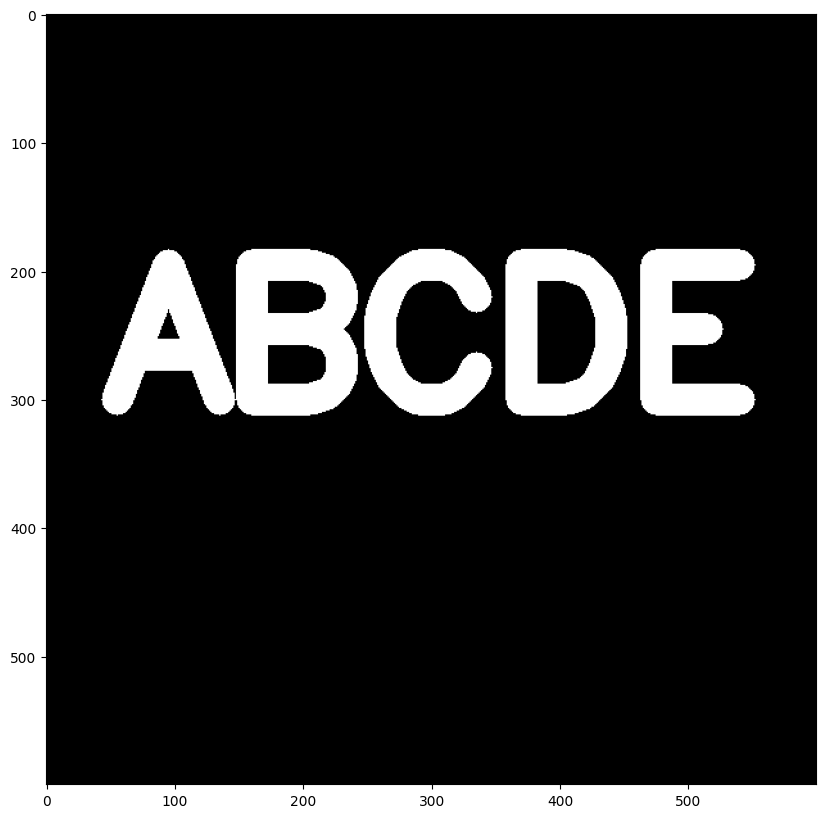

In [44]:
img = load_img()
display_img(img)

In [45]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

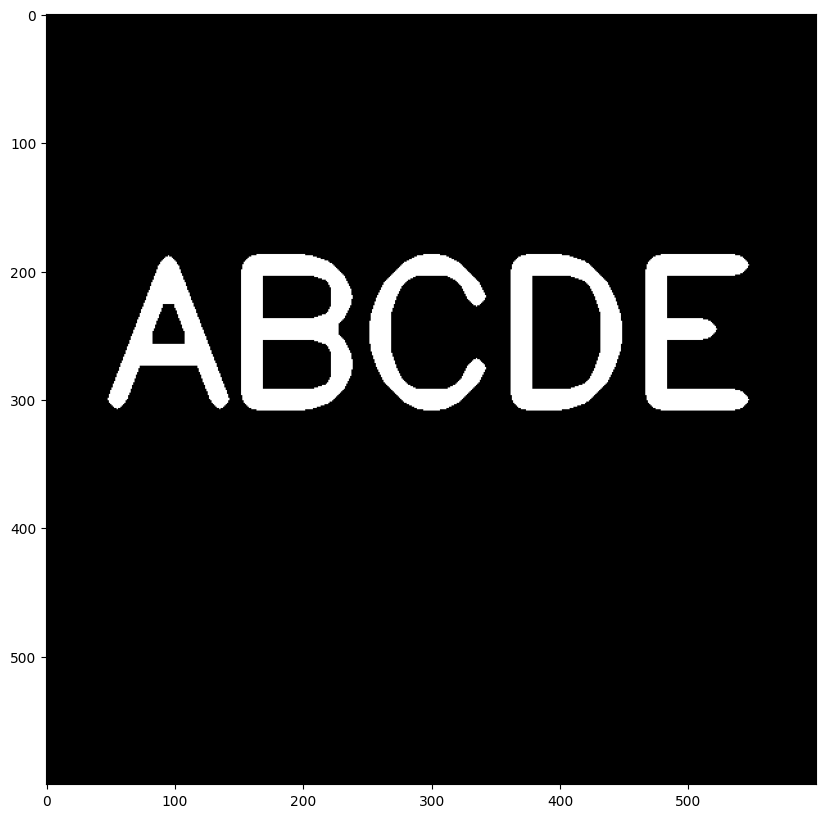

In [46]:
result=cv2.erode(img,kernel,iterations=2) #erozyon yapıyor. 
display_img(result)

In [47]:
img = load_img()

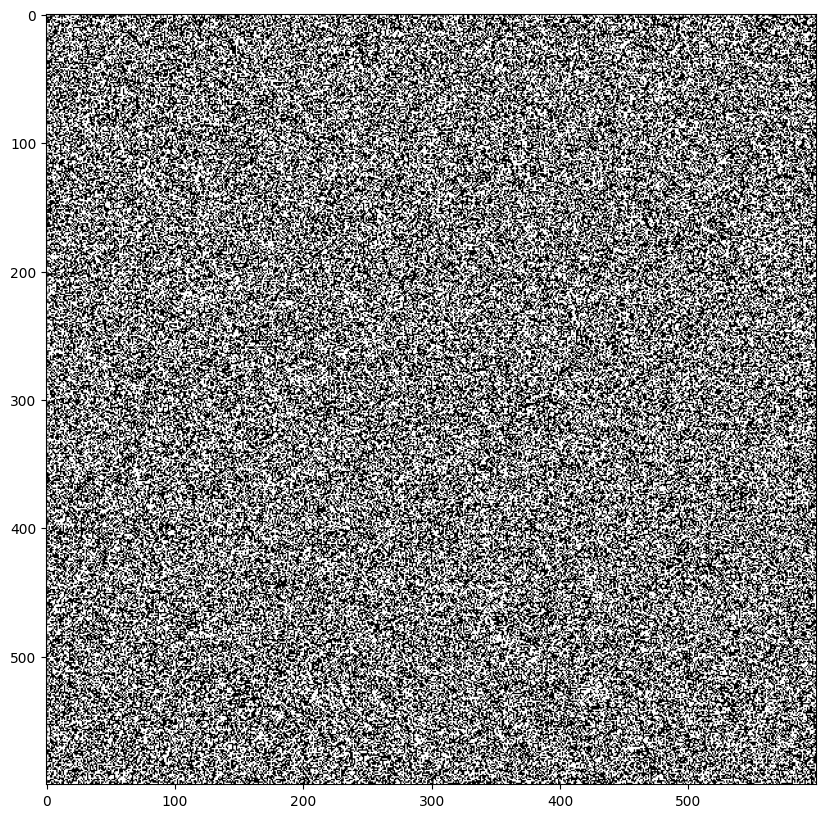

In [48]:
white_noise= np.random.randint(low=0,high=2,size=(600,600))
display_img(white_noise)

In [49]:
white_noise=white_noise*255 #image ile aynı scalede olsun diye.

In [50]:
noised_img= img + white_noise

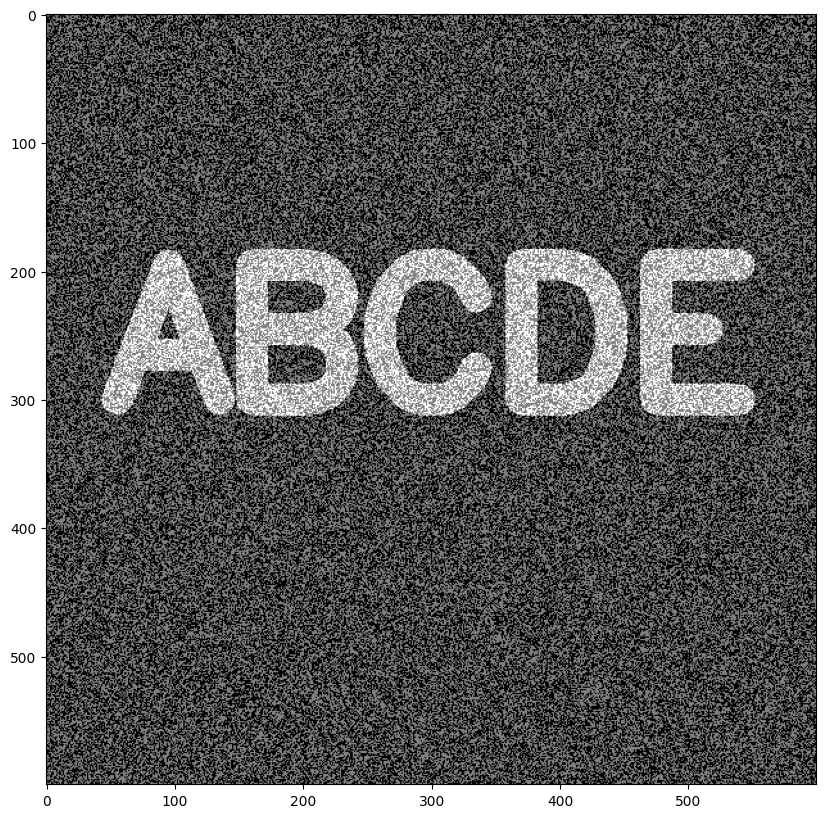

In [51]:
display_img(noised_img)

In [ ]:
#opening kullanarak noiseden (white noise) kurtulma, background noiseden kurtulmak için.
#opening = erozyon(erosion) + genişleme(dialetion)
opening=cv2.morphologyEx(noised_img,cv2.MORPH_OPEN,kernel)

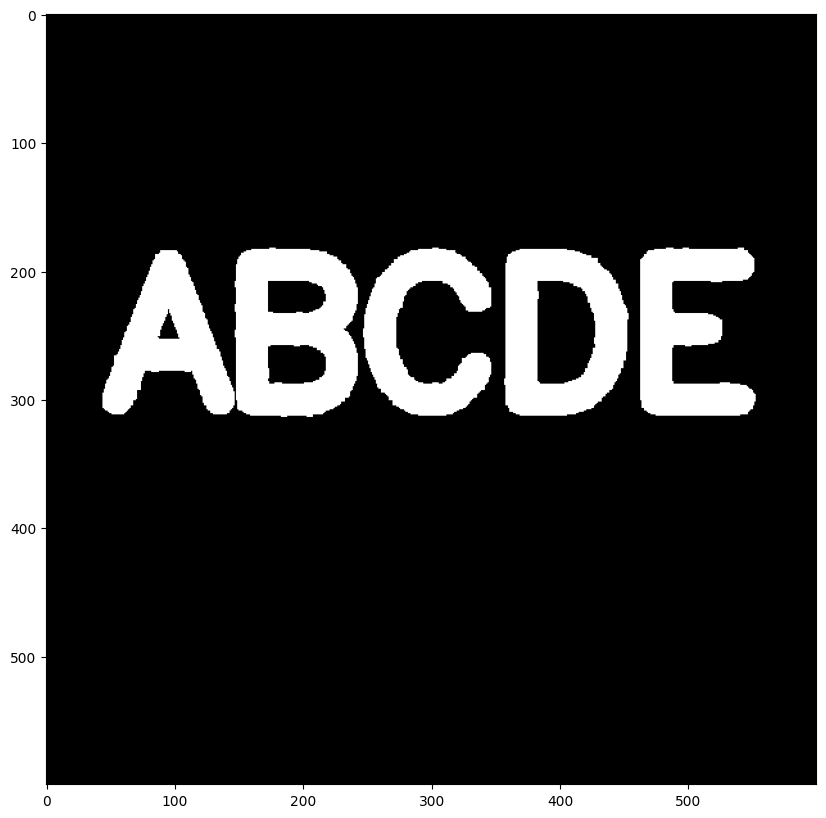

In [53]:
display_img(opening)

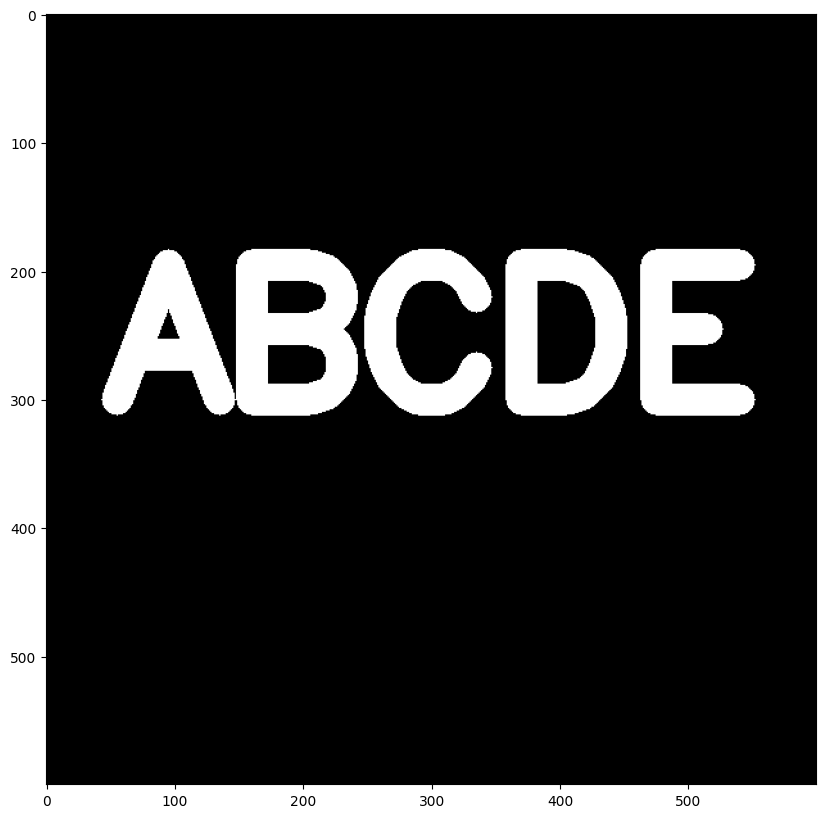

In [54]:
display_img(img)

In [55]:
img = load_img()

In [64]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise*=-255
black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255]=0 #-255leri 0 yaptık. Siyahlar eksiye düştü, beyazlardan da siyahlar oluştu.

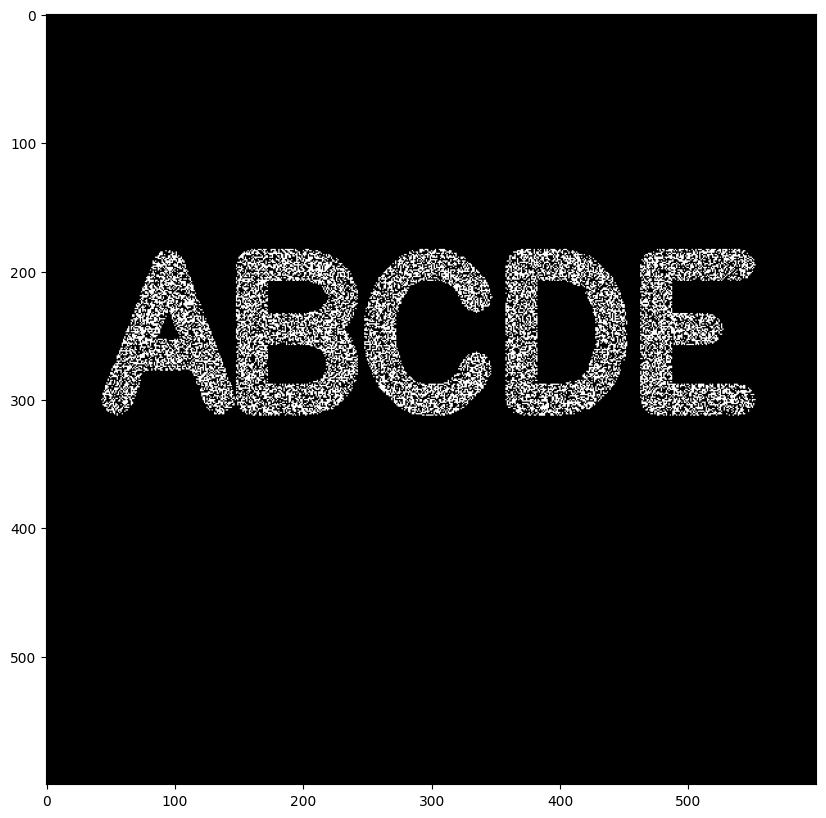

In [65]:
display_img(black_noise_img)

In [67]:
#closing ile black noisden kurtulma
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel=kernel)

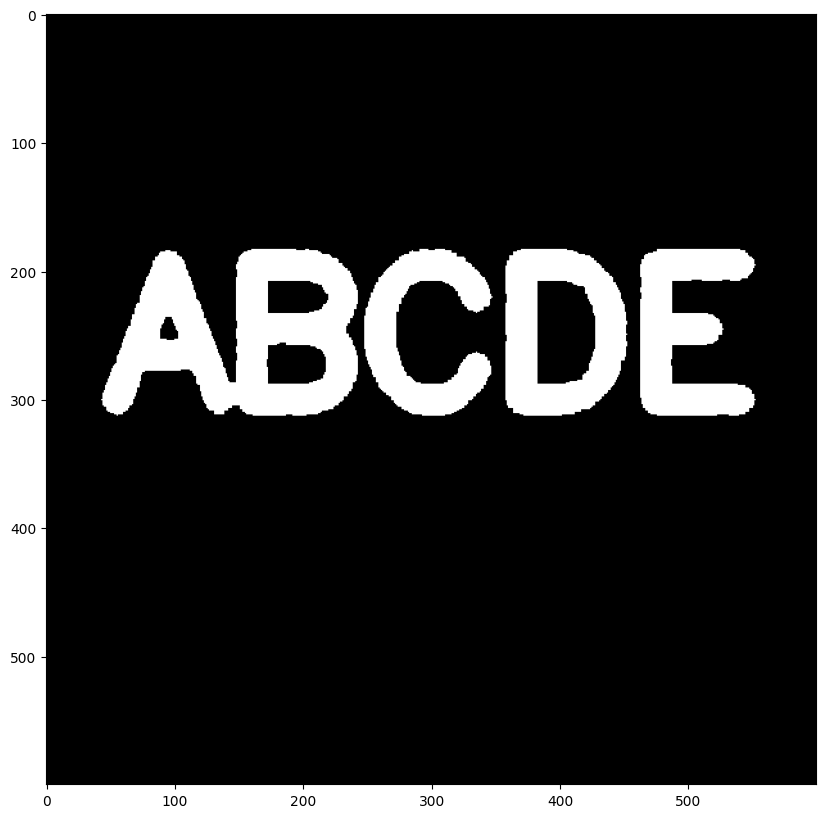

In [69]:
display_img(closing)

In [70]:
img = load_img()

In [73]:
#GRANDİENT İLE KENAR BELİRLEME
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel=kernel)

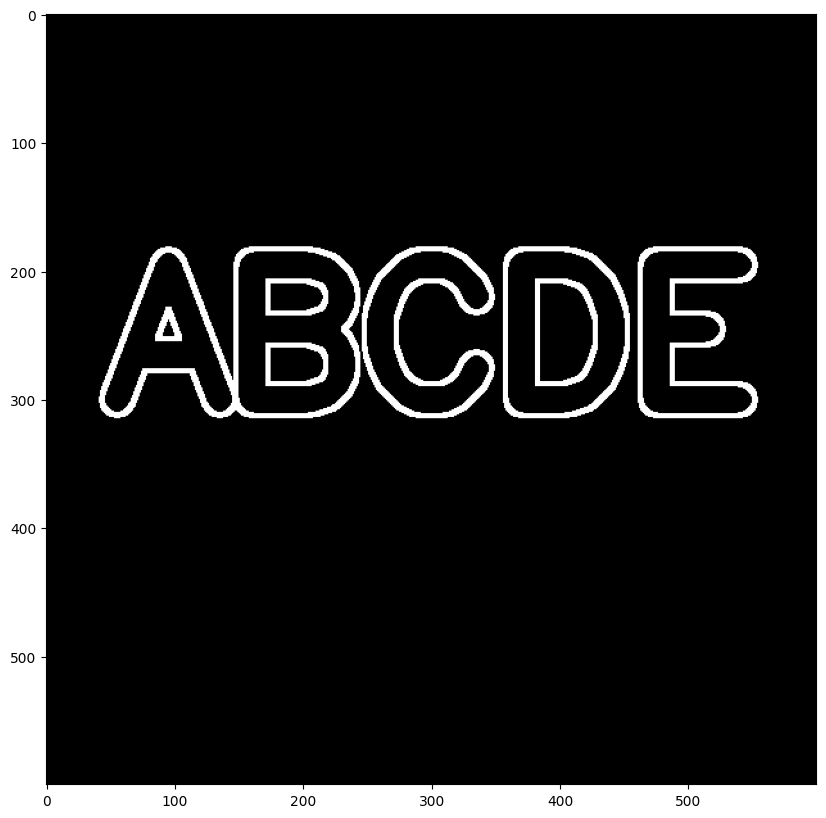

In [74]:
display_img(gradient)